# Understanding spot diagrams

In this notebook we are going to take a look at spot diagrams. We will see how to read them, and what abberations look like on a spot diagram.

In [3]:
from rayoptics.environment import *

## Create our optical system

We start by defining a simple optical system for our analysis. It consists of a biconvex lens, 1/2f from the object plane and a variable distance from the image plane. This arrangement is a single-lens imaging setup.

For convenience, we define a function which defines the optical system. 
It takes as input arguments:
* The distance between the lens and the image plane.
* The radial distance of our object field, measured from the axis.
* The wavelengths of light to use.

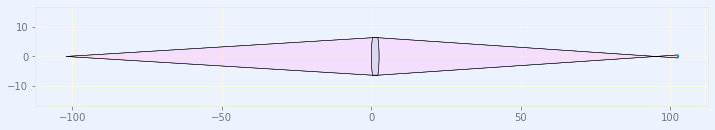

In [32]:
def lens_system(image_distance, object_radial, wavelengths):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[object_radial])
    osp.spectral_region = WvlSpec(wavelengths, ref_wl=0)
    opm.radius_mode = True
    lens_thickness = 2.6
    lens_R = 51.1

    sm.gaps[0].thi=2*lens_R
    sm.add_surface([lens_R, lens_thickness, 'N-BK7', 'Schott'])
    sm.set_stop()
    sm.add_surface([-lens_R, image_distance])
    opm.update_model()
    return opm

model = lens_system(100.0, 0.0, [(587.5618, 1.0)])
plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100, do_draw_frame=True).plot().set_size_inches(10,2)

# What is a spot diagram?

Let's take a single point in the object plane (the left side of the layout above).
Imagine that this point emits rays at different angles, which travel through the optical system.
In a flawless imaging system, these different rays would be focused to a single point on the image plane.

Real systems suffer from abberations.
These abberations cause different paths through the optical system to be imaged at different points in the image plane.

A spot diagram is a visualisation that shows where these different paths are imaged.
It is a helpful way to visualise abberations.
Let's take a look at some specific examples.

## Spot diagrams when out of focus

The focus occurs when the points from the separate rays are as close as they can be.
For a spot diagram either side of the focus, the points in the spot diagram are spread out.
Below, we construct spot diagrams for different distances from the lens.
The plots have the same axes limits to aid comparison of the spot size.

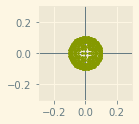

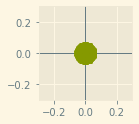

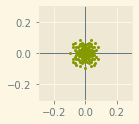

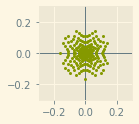

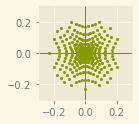

In [33]:
def set_limits(fig):
    fig.set_size_inches(1.5,1.5)
    for ax in fig.get_axes():
        ax.set_ylim(-0.3,0.3)
        ax.set_xlim(-0.3,0.3)
    return fig

wavelengths = [(587.5618, 1.0)]
model = lens_system(92.0, 0.0, wavelengths)
p_singlet = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot())

model = lens_system(93.0, 0.0, wavelengths)
p_singlet = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot())

model = lens_system(94.0, 0.0, wavelengths)
p_singlet = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot())

model = lens_system(95.0, 0.0, wavelengths)
p_singlet = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot())

model = lens_system(96.0, 0.0, wavelengths)
p_singlet = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot())


The above spot diagrams show that the points are closest together when the distance between the lens and the image plane is around 93mm.
This definition of 'focus' is also referred to as the _circle of least confusion_.
Even near the focus, abberations prevent the formation of a perfect spot.


## Spot diagrams for abberations when the object is off-axis

Let's compare the spot diagrams for imaging on-axis and off-axis points in the object plane. 
The two cases we are considering are illustrated below:

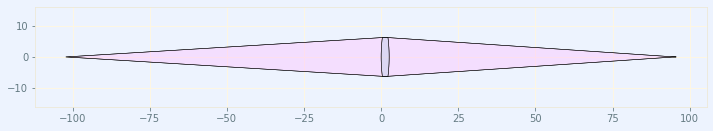

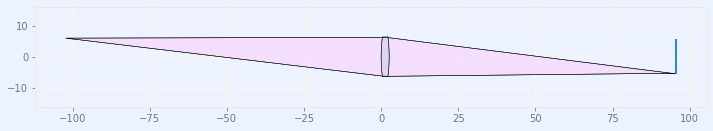

In [34]:
wavelengths = [(587.5618, 1.0)]
model_on_axis = lens_system(93.0, 0.0, wavelengths)
model_off_axis = lens_system(93.0, 6, wavelengths)

plt.figure(FigureClass=LensLayoutFigure, opt_model=model_on_axis, do_draw_rays=True, offset_factor=100, do_draw_frame=True).plot().set_size_inches(10,2)
plt.figure(FigureClass=LensLayoutFigure, opt_model=model_off_axis, do_draw_rays=True, offset_factor=100, do_draw_frame=True).plot().set_size_inches(10,2)

The spot diagrams are:

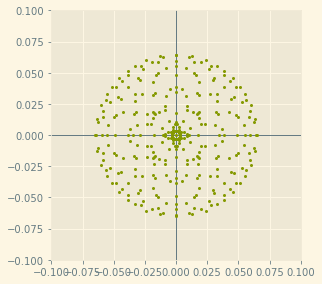

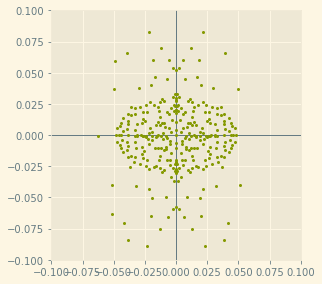

In [35]:
def set_limits(fig):
    fig.set_size_inches(4,4)
    for ax in fig.get_axes():
        ax.set_ylim(-0.1,0.1)
        ax.set_xlim(-0.1,0.1)
    return fig

p = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model_on_axis).plot())
p = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model_off_axis).plot())

It appears that the off-axis case experiences some astigmatism, as the points have an elliptical arrangement.

## Spot diagrams for chromatic abberations

In the same way, we can compare spot diagrams for different wavelengths of light.
Chromatic abberation in our system will cause the light to focus at different distances from the lens, so we expect that the point diagrams will have different radii.

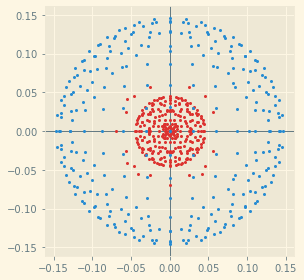

In [37]:
wavelengths = [(550, 1.0), (780, 1.0)]
model = lens_system(93.0, 0.0, wavelengths)

p = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()